In [1]:
import numpy as np
from matplotlib import pyplot as plt

plt.style.use("dark_background")

In [27]:
def f(x):
    return (-6) * x + (-17) * pow(x, 2) + 3 * pow(x, 3) + 5

def model(w0, w1, w2, b, x):
    return w0 * x + w1 * pow(x, 2) + w2 * pow(x, 3) + b

def J(w0, w1, w2, b=0):
    diff_sq = np.power(model(w0, w1, w2, b, x_train) - y_train, 2)
    cost = np.mean(diff_sq) / 2
    print(cost)
    plt.plot(diff_sq)

def dw0(w0, w1, w2, b):
    return np.mean((model(w0, w1, w2, b, x_train) - y_train) * x_train)

def dw1(w0, w1, w2, b):
    return np.mean((model(w0, w1, w2, b, x_train) - y_train) * np.power(x_train, 2))

def dw2(w0, w1, w2, b):
    return np.mean((model(w0, w1, w2, b, x_train) - y_train) * np.power(x_train, 3))

def db(w0, w1, w2, b):
    return np.mean(model(w0, w1, w2, b, x_train) - y_train)

def gradient_descent(w0_init, w1_init, w2_init, b_init, alpha=0.1, max_iteration=10_000):
    w0 = w0_init
    w1 = w1_init
    w2 = w2_init
    b = b_init
    dj_dw0 = dw0(w0, w1, w2, b)
    dj_dw1 = dw1(w0, w1, w2, b)
    dj_dw2 = dw2(w0, w1, w2, b)
    dj_db = db(w0, w1, w2, b)
    while not ( sum([dj_dw0, dj_dw1, dj_dw2, dj_db]) == 0 ) and max_iteration:
        w0 -= alpha * dj_dw0
        w1 -= alpha * dj_dw1
        w2 -= alpha * dj_dw2
        b -= alpha * dj_db
        
        dj_dw0 = dw0(w0, w1, w2, b)
        dj_dw1 = dw1(w0, w1, w2, b)
        dj_dw2 = dw2(w0, w1, w2, b)
        dj_db = db(w0, w1, w2, b)

        max_iteration -= 1
    
    return w0, w1, w2, b

[-5 -4 -3 -2 -1  0  1  2  3  4  5]
[-765 -435 -211  -75   -9    5  -15  -51  -85  -99  -75]
11


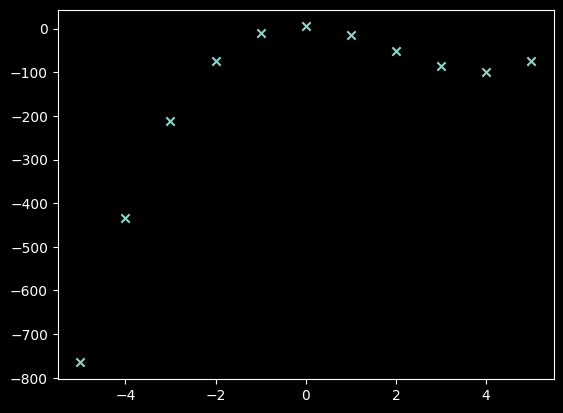

In [28]:
x_train = np.arange(-5, 6)
y_train = np.array([f(x) for x in x_train])
m = x_train.size

print(x_train, y_train, m, sep='\n')
plt.scatter(x_train, y_train, marker='x')

In [30]:
*coefficient, intercept = gradient_descent(0, 0, 0, 0, 0.0001, max_iteration=50_000)
coefficient, intercept

([-5.996649111706079, -16.962349972148093, 2.9998400272309285],
 4.331474133423088)

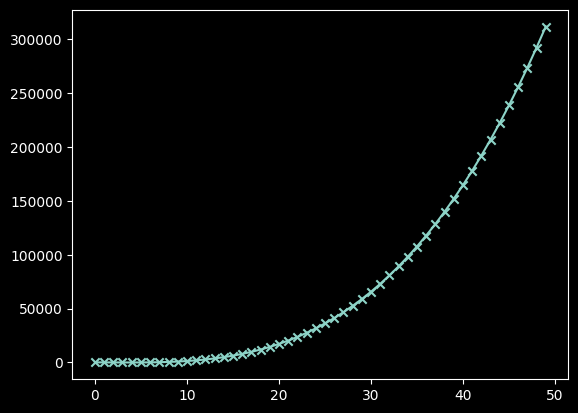

In [36]:
x_test = np.arange(50)
y_test = np.array([f(x) for x in x_test])
y_pred = np.array([model(*coefficient, intercept, x) for x in x_test])

plt.scatter(x_test, y_test, marker='x')
plt.plot(x_test, y_pred)